## Load data

In [7]:
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt

data_path = r'D:\Wormax\data\nn'
screen_size = (1680, 1050)

arr = np.empty((0, 11))
for file in sorted(os.listdir(data_path)):
    if not file[-3:] == 'npy':
        continue
    tmp = np.load(os.path.join(data_path, file))
    arr = np.append(arr, tmp, axis=0)
    
arr = arr.astype(np.int64)

## View data

[x, 
                            y, 
                            isPressed, 
                            'Q' in keys,
                            'W' in keys,
                            'E' in keys,
                            ' ' in keys,
                            time.time()]

In [8]:
arr.shape

(542687, 11)

In [9]:
def plot(array, title='', axis=plt):
    axis.title.set_text(title)
    axis.plot(np.arange(len(array)), array)    

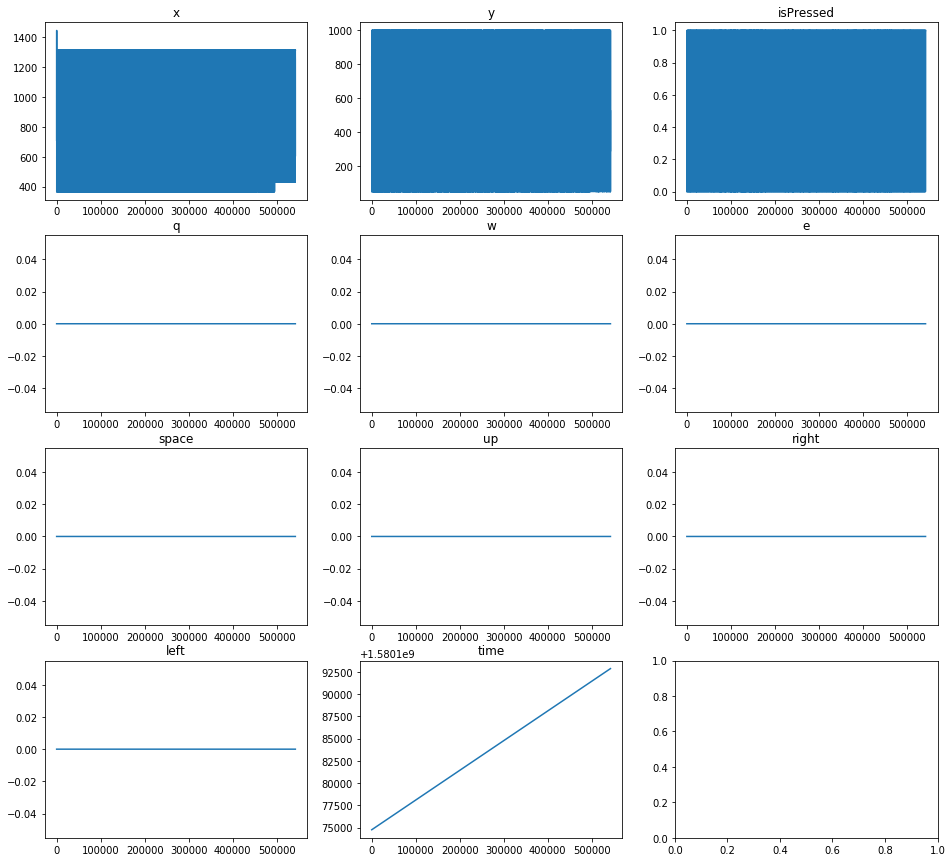

In [10]:
fig, axs = plt.subplots(4, 3, figsize=(16, 15))
plot(arr[:, 0], 'x', axs[0, 0])
plot(arr[:, 1], 'y', axs[0, 1])
plot(arr[:, 2], 'isPressed', axs[0, 2])
plot(arr[:, 3], 'q', axs[1, 0])
plot(arr[:, 4], 'w', axs[1, 1])
plot(arr[:, 5], 'e', axs[1, 2])
plot(arr[:, 6], 'space', axs[2, 0])
plot(arr[:, 7], 'up', axs[2, 1])
plot(arr[:, 8], 'right', axs[2, 2])
plot(arr[:, 9], 'left', axs[3, 0])
plot(arr[:, 10], 'time', axs[3, 1])

# plt.savefig(f'logs/{env_name}')

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

hi
h2i
hi3


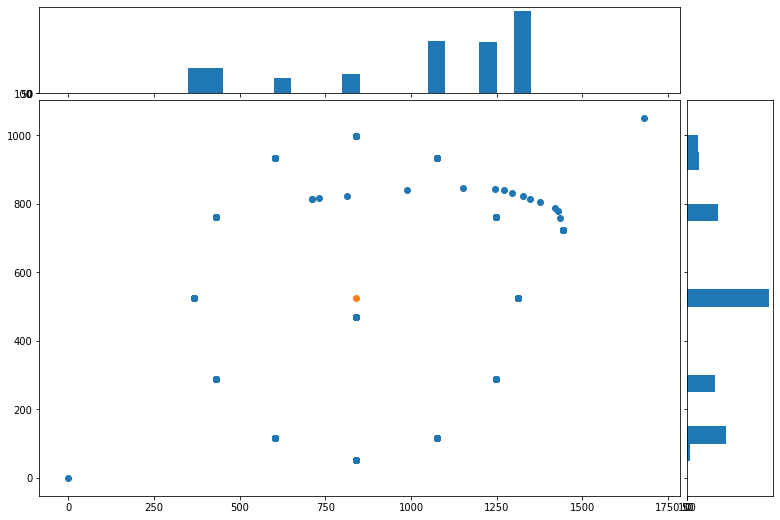

In [12]:
x = list(arr[:, 0])
y = list(arr[:, 1])

x.append(0)
x.append(screen_size[0])

y.append(0)
y.append(screen_size[1])

print('hi')

fig, axScatter = plt.subplots(figsize=(16, 9))

# the scatter plot:
axScatter.scatter(x, y)
axScatter.set_aspect(1.)

axScatter.scatter([screen_size[0] / 2], [screen_size[1] / 2])

# create new axes on the right and on the top of the current axes
# The first argument of the new_vertical(new_horizontal) method is
# the height (width) of the axes to be created in inches.
divider = make_axes_locatable(axScatter)
axHistx = divider.append_axes("top", 1.2, pad=0.1, sharex=axScatter)
axHisty = divider.append_axes("right", 1.2, pad=0.1, sharey=axScatter)
print('h2i')

# make some labels invisible
axHistx.xaxis.set_tick_params(labelbottom=False)
axHisty.yaxis.set_tick_params(labelleft=False)

# now determine nice limits by hand:
binwidth = 50
limx = screen_size[0]
limy = screen_size[1]


binsx = np.arange(0, limx + binwidth, binwidth)
binsy = np.arange(0, limy + binwidth, binwidth)

axHistx.hist(x, bins=binsx)
axHisty.hist(y, bins=binsy, orientation='horizontal')
print('hi3')

# the xaxis of axHistx and yaxis of axHisty are shared with axScatter,
# thus there is no need to manually adjust the xlim and ylim of these
# axis.

axHistx.set_yticks([0, 50, 100])

axHisty.set_xticks([0, 50, 100])
plt.show()

In [13]:
def rolling_window(a, stride=1, width=3):
    return np.vstack([a[i : 1 + i - width or None : stride] for i in range(width)]).T

windows = rolling_window(arr[:, 1], stride=1, width=300)
am = windows.std(axis=-1).argmin()

In [14]:
(1565059693 - 1565058905.5060508) / 60

13.124899152914683

In [15]:
print(arr[am, -1], windows[am])

1580189861 [525 525 525 761 761 525 525 525 525 525 525 525 525 525 525 288 288 525
 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525
 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525
 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525
 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525
 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525
 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525
 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525
 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525
 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525
 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525
 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525
 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525 525
 525 525 525 525 525 761 525 525 525 525

## View mp4


In [16]:
import os
import datetime

video_path = input('Input path to file: ')
unix_time = os.path.getctime(video_path)
converted = datetime.datetime.utcfromtimestamp(unix_time).strftime('%Y-%m-%d "%H:%M:%S.%f"')

print(unix_time)
print(converted)

Input path to file: D:\Wormax\data\nn\2020-01-28 04-25-57.mp4
1580197356.239283
2020-01-28 "07:42:36.239283"


In [17]:
import skvideo.io
import json

videodata = skvideo.io.ffprobe(video_path)

print(videodata.keys())
print(json.dumps(videodata['video'], indent=4))

dict_keys(['video'])
{
    "@index": "0",
    "@codec_name": "h264",
    "@codec_long_name": "H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10",
    "@profile": "High",
    "@codec_type": "video",
    "@codec_time_base": "1/60",
    "@codec_tag_string": "avc1",
    "@codec_tag": "0x31637661",
    "@width": "960",
    "@height": "600",
    "@coded_width": "960",
    "@coded_height": "608",
    "@has_b_frames": "2",
    "@pix_fmt": "yuv420p",
    "@level": "31",
    "@color_range": "tv",
    "@color_space": "bt470bg",
    "@chroma_location": "left",
    "@refs": "1",
    "@is_avc": "true",
    "@nal_length_size": "4",
    "@r_frame_rate": "30/1",
    "@avg_frame_rate": "30/1",
    "@time_base": "1/15360",
    "@start_pts": "0",
    "@start_time": "0.000000",
    "@duration_ts": "253594624",
    "@duration": "16510.066667",
    "@bit_rate": "1000338",
    "@bits_per_raw_sample": "8",
    "@nb_frames": "495302",
    "disposition": {
        "@default": "1",
        "@dub": "0",
        "@original

In [20]:
import matplotlib.pyplot as plt
import cv2

for i in range(6000):
    cv2.imshow('win', videodata['video'][i])
    cv2.waitKey(1)

KeyError: 0